# Travelers Statistical Modeling Competition
### Predict fraud
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

## 1. Defining the problem statement
Complete the analysis of what sorts of claims are fraud.  

## 2. Collecting the data

training data set and testing data set are given by Kaggle
you can download from  
https://www.kaggle.com/c/2018%20Travelers%20Statistical%20Modeling%20Competition/data

### 2.1 load train, test dataset using Pandas

In [38]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# use the code below to make sure plot is shown in Notebook
%matplotlib inline 

In [39]:
import os
os.chdir('C:\\Users\\jaech\\Desktop\\Travelers')
train = pd.read_excel('uconn_comp_2018_train.xlsx', na_values=['NaN',''])
train.head(3)

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1


### 2.2 import python lib for visualization

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

## 3. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [41]:
train.head(5)

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


### 3.1 Data Dictionary
- claim number - Claim ID (cannot be used in model)
- age_of_driver - Age of driver
- gender - Gender of driver
- marital_status - Marital status of driver
- safty_rating - Safety rating index of driver
- annual_income - Annual income of driver
- high_education_ind - Driver’s high education index
- address_change_ind - Whether or not the driver changed living address in past 1 year
- living_status - Driver’s living status, own or rent
- zip_code - Driver’s living address zipcode
- claim_date - Date of first notice of claim
- claim_day_of_week - Day of week of first notice of claim
- accident_site - Accident location, highway, parking lot or local
- past_num_of_claims - Number of claims the driver reported in past 5 years
- witness_present_ind - Witness indicator of the claim
- liab_prct - Liability percentage of the claim
- channel - The channel of policy purchasing
- policy_report_filed_ind - Policy report filed indicator
- claim_est_payout - Estimated claim payout
- age_of_vehicle - Age of first party vehicle
- vehicle_category - Category of first party vehicle
- vehicle_price - Price of first party vehicle
- vehicle_color - Color of first party vehicle
- vehicle_weight - Weight of first party vehicle
- fraud - Fraud indicator (0=no, 1=yes). This is the response variable

### 3.2 Data overview (shape, info)

In [42]:
train.shape
#We can see that there are 17998 rows and 25 columns in our training dataset.

(17998, 25)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17998 entries, 0 to 17997
Data columns (total 25 columns):
claim_number               17998 non-null int64
age_of_driver              17998 non-null int64
gender                     17998 non-null object
marital_status             17993 non-null float64
safty_rating               17998 non-null int64
annual_income              17998 non-null int64
high_education_ind         17998 non-null int64
address_change_ind         17998 non-null int64
living_status              17998 non-null object
zip_code                   17998 non-null int64
claim_date                 17998 non-null object
claim_day_of_week          17998 non-null object
accident_site              17998 non-null object
past_num_of_claims         17998 non-null int64
witness_present_ind        17866 non-null float64
liab_prct                  17998 non-null int64
channel                    17998 non-null object
policy_report_filed_ind    17998 non-null int64
claim_est_payout 

In [44]:
# check null values after dropping -1 fraud values
train.isnull().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

In [45]:
train.nunique()

claim_number               17998
age_of_driver                 87
gender                         2
marital_status                 2
safty_rating                 100
annual_income               2693
high_education_ind             2
address_change_ind             2
living_status                  2
zip_code                     276
claim_date                   731
claim_day_of_week              7
accident_site                  3
past_num_of_claims             7
witness_present_ind            2
liab_prct                    101
channel                        3
policy_report_filed_ind        2
claim_est_payout           17981
age_of_vehicle                17
vehicle_category               3
vehicle_price              17998
vehicle_color                  7
vehicle_weight             17998
fraud                          3
dtype: int64

In [46]:
# This is to check which are numeric features
cols = train.columns
num_cols = train._get_numeric_data().columns
num_cols
#len(num_cols)

Index(['claim_number', 'age_of_driver', 'marital_status', 'safty_rating',
       'annual_income', 'high_education_ind', 'address_change_ind', 'zip_code',
       'past_num_of_claims', 'witness_present_ind', 'liab_prct',
       'policy_report_filed_ind', 'claim_est_payout', 'age_of_vehicle',
       'vehicle_price', 'vehicle_weight', 'fraud'],
      dtype='object')

In [47]:
# This is to check which are categorical features
list(set(cols) - set(num_cols))

['accident_site',
 'vehicle_color',
 'gender',
 'vehicle_category',
 'claim_date',
 'living_status',
 'claim_day_of_week',
 'channel']

In [48]:
# give only the columns that have null values
null_columns=train.columns[train.isnull().any()]
train[null_columns].isnull().sum()

marital_status           5
witness_present_ind    132
claim_est_payout        17
age_of_vehicle           8
dtype: int64

In [49]:
train.describe()

,claim_number,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,zip_code,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,vehicle_weight,fraud
count,17998.000000,17998.000000,17993.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17998.000000,17866.000000,17998.000000,17998.000000,17981.000000,17990.000000,17998.000000,17998.000000,17998.000000
mean,14970.601622,43.695466,0.712722,73.562951,37367.655684,0.699189,0.577286,49875.595955,0.505001,0.232677,49.423269,0.600678,4975.792083,5.008060,23089.123114,23031.322385,0.156295
std,8659.940765,11.959819,0.452505,15.346807,2957.297249,0.458623,0.494004,29214.655149,0.955504,0.422550,33.678470,0.489773,2215.706510,2.258391,11988.429767,12052.385584,0.363604
min,1.000000,18.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,282.639432,0.000000,2457.329316,2429.429302,-1.000000
25%,7479.250000,35.000000,0.000000,65.000000,35554.000000,0.000000,0.000000,20111.000000,0.000000,0.000000,17.000000,0.000000,3337.029436,3.000000,14279.574850,14164.122133,0.000000
50%,14965.500000,43.000000,1.000000,76.000000,37610.000000,1.000000,1.000000,50028.000000,0.000000,0.000000,50.000000,1.000000,4668.796318,5.000000,20948.879250,20838.150260,0.000000
75%,22467.750000,51.000000,1.000000,85.000000,39318.000000,1.000000,1.000000,80038.000000,1.000000,0.000000,81.000000,1.000000,6255.901066,6.000000,29562.232780,29430.446293,0.000000
max,30000.000000,229.000000,1.000000,100.000000,54333.000000,1.000000,1.000000,85083.000000,6.000000,1.000000,100.000000,1.000000,17218.345010,16.000000,127063.506000,123016.650400,1.000000


### 3.3 Target variable exploration

In [50]:
# The intent here is to find the distribution of target column
train['fraud'].value_counts()

 0    15179
 1     2816
-1        3
Name: fraud, dtype: int64

In [51]:
# this is to examine those 3 records having fraud = =1
train[train['fraud']==-1]

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
82,132,32,F,1.0,66,34676,1,0,Own,85060,...,8,Broker,0,7142.277506,9.0,Compact,18070.366510,black,7337.606862,-1
12825,21336,47,F,1.0,90,38505,0,1,Own,80034,...,23,Broker,0,5952.444157,4.0,Large,8679.988214,silver,30798.717700,-1
15515,25842,39,F,1.0,66,36632,0,1,Own,80044,...,9,Online,0,4554.701439,5.0,Large,16682.989780,silver,26112.502690,-1


### 3.4 Visualization

In [52]:
def bar_chart(feature):
    fraud = train[train['fraud']==1][feature].value_counts()
    not_fraud = train[train['fraud']==0][feature].value_counts()
    df = pd.DataFrame([fraud, not_fraud])
    df.index = ['fraud','not_fraud']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

### age_of_driver

In [53]:
train.age_of_driver.describe()

count    17998.000000
mean        43.695466
std         11.959819
min         18.000000
25%         35.000000
50%         43.000000
75%         51.000000
max        229.000000
Name: age_of_driver, dtype: float64

(0, 100)

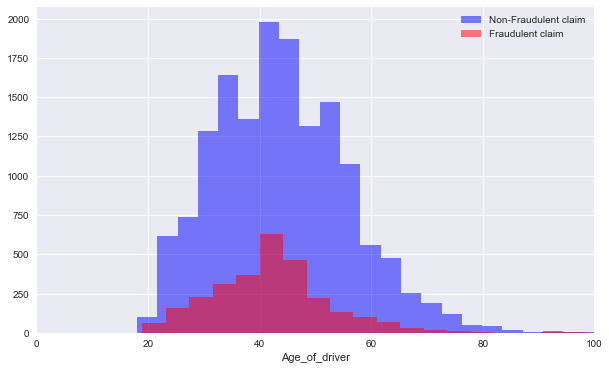

In [54]:
# Distribution of age_of_driver 
plt.figure(figsize=(10,6))
train[train['fraud']==0]['age_of_driver'].hist(alpha=0.5,color='blue',bins=50,label='Non-Fraudulent claim')
train[train['fraud']==1]['age_of_driver'].hist(alpha=0.5,color='red',bins=50,label='Fraudulent claim')
plt.legend()
plt.xlabel('Age_of_driver')
plt.xlim([0,100])

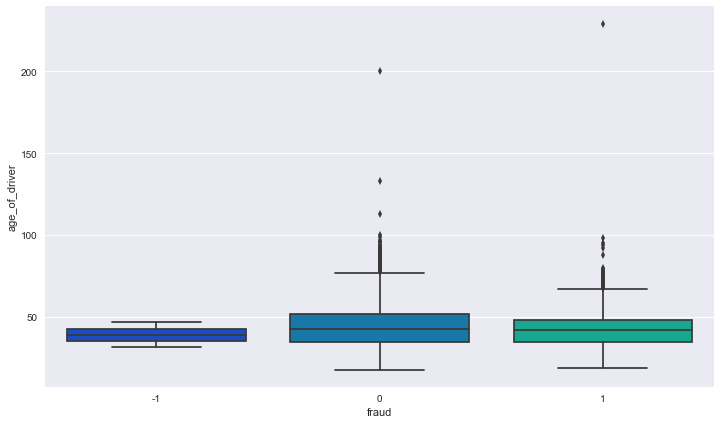

In [55]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='fraud',y='age_of_driver',data=train,palette='winter')

### gender

- M: 0
- F: 1

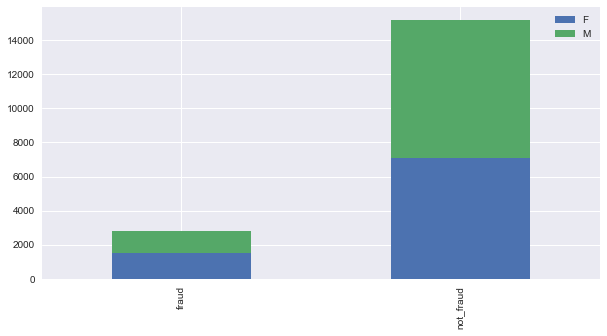

In [56]:
bar_chart('gender')

### marital_status

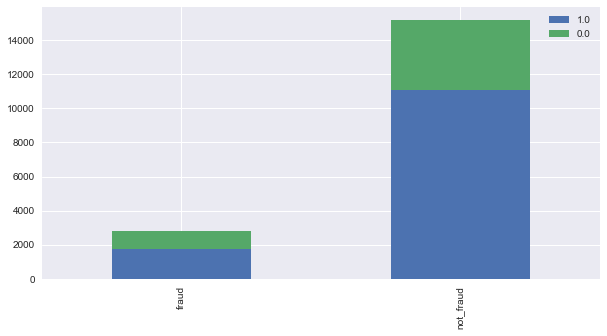

In [57]:
bar_chart('marital_status')
# married client is more likely to be not fraud

### safty_rating

(0, 100)

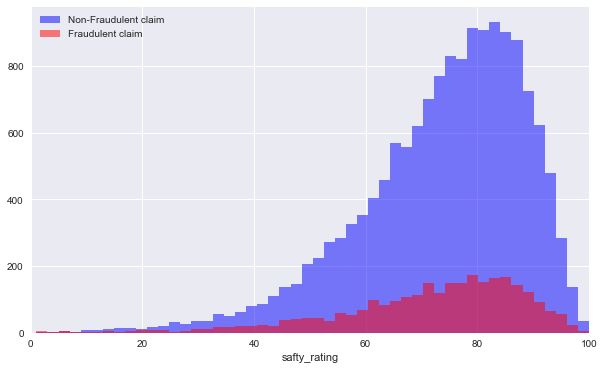

In [58]:
# Distribution of safty_rating
plt.figure(figsize=(10,6))
train[train['fraud']==0]['safty_rating'].hist(alpha=0.5,color='blue',bins=50,label='Non-Fraudulent claim')
train[train['fraud']==1]['safty_rating'].hist(alpha=0.5,color='red',bins=50,label='Fraudulent claim')
plt.legend()
plt.xlabel('safty_rating')
plt.xlim([0,100])

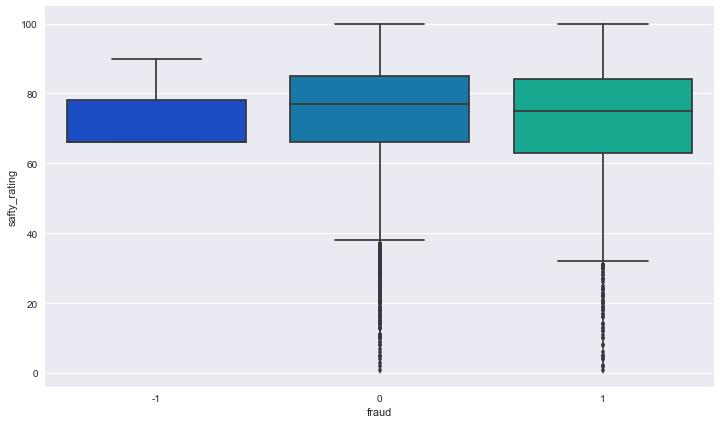

In [59]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='fraud',y='safty_rating',data=train,palette='winter')

### annual_income

In [62]:
train.annual_income.describe()

count    17998.000000
mean     37367.655684
std       2957.297249
min         -1.000000
25%      35554.000000
50%      37610.000000
75%      39318.000000
max      54333.000000
Name: annual_income, dtype: float64

(0, 55000)

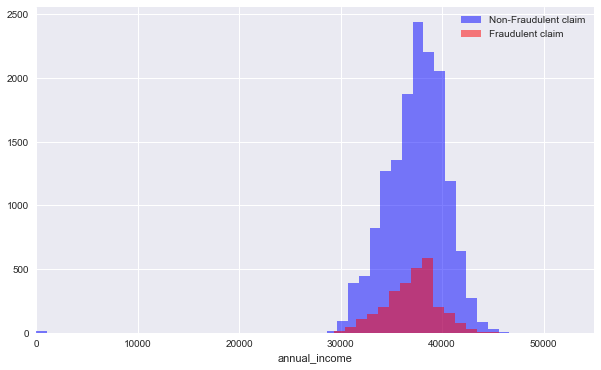

In [63]:
# Distribution of annual_income
plt.figure(figsize=(10,6))
train[train['fraud']==0]['annual_income'].hist(alpha=0.5,color='blue',bins=50,label='Non-Fraudulent claim')
train[train['fraud']==1]['annual_income'].hist(alpha=0.5,color='red',bins=50,label='Fraudulent claim')
plt.legend()
plt.xlabel('annual_income')
plt.xlim([0,55000])

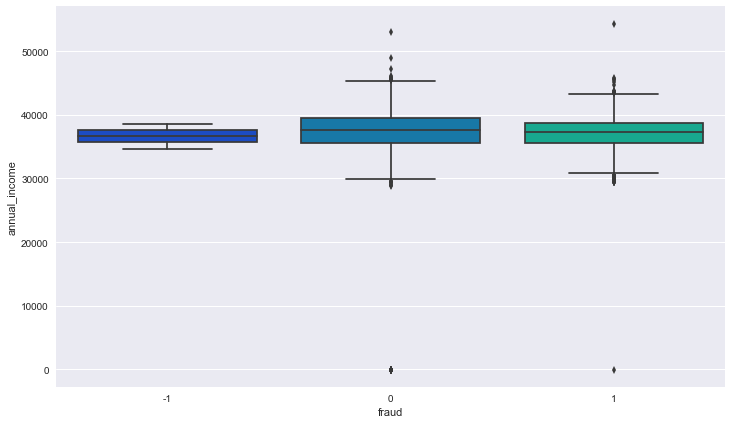

In [64]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='fraud',y='annual_income',data=train,palette='winter')

### high_education_ind

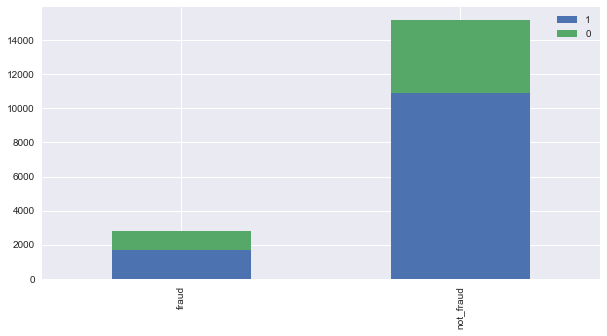

In [65]:
bar_chart('high_education_ind')
#one with high education is less likely to commit fraud

### address_change_ind

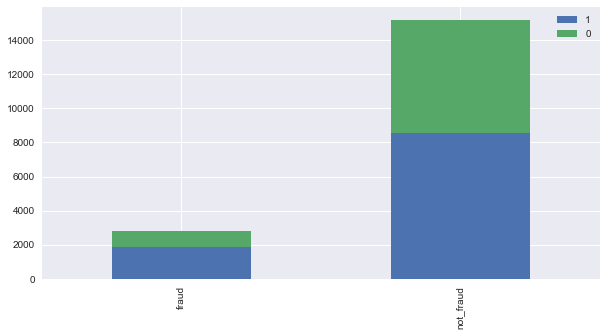

In [66]:
bar_chart('address_change_ind')

### living_status

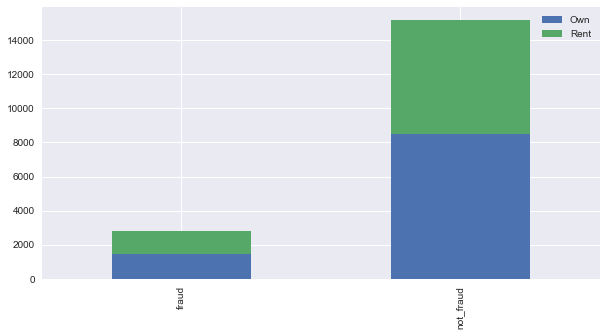

In [67]:
bar_chart('living_status')

### claim_day_of_week

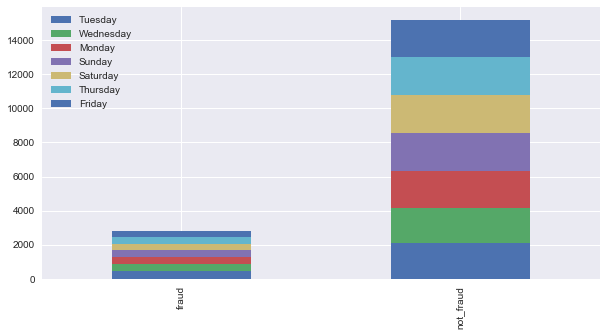

In [68]:
bar_chart('claim_day_of_week')

### accident_site

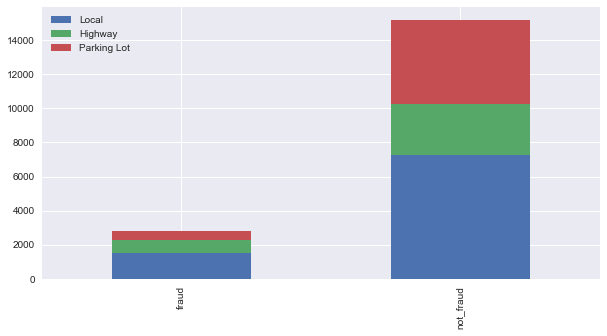

In [69]:
bar_chart('accident_site')

### past_num_of_claims

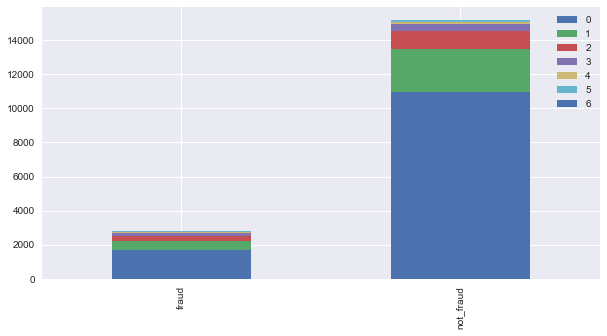

In [70]:
bar_chart('past_num_of_claims')

### witness_present_ind

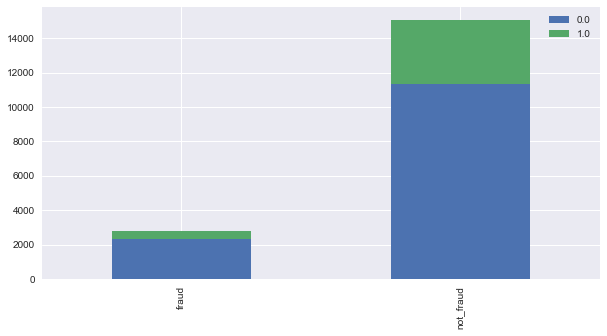

In [71]:
bar_chart('witness_present_ind')

### liab_prct

(0, 100)

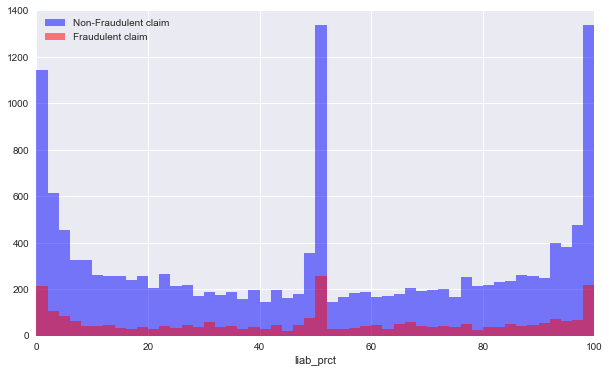

In [72]:
# Distribution of liab_prct
plt.figure(figsize=(10,6))
train[train['fraud']==0]['liab_prct'].hist(alpha=0.5,color='blue',bins=50,label='Non-Fraudulent claim')
train[train['fraud']==1]['liab_prct'].hist(alpha=0.5,color='red',bins=50,label='Fraudulent claim')
plt.legend()
plt.xlabel('liab_prct')
plt.xlim([0,100])

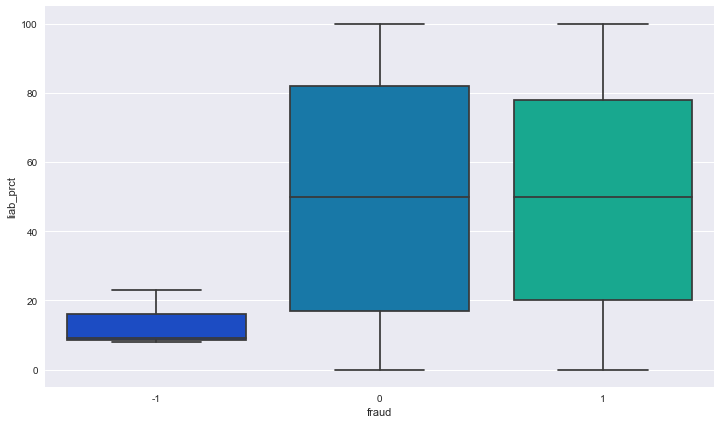

In [73]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='fraud',y='liab_prct',data=train,palette='winter')

### channel

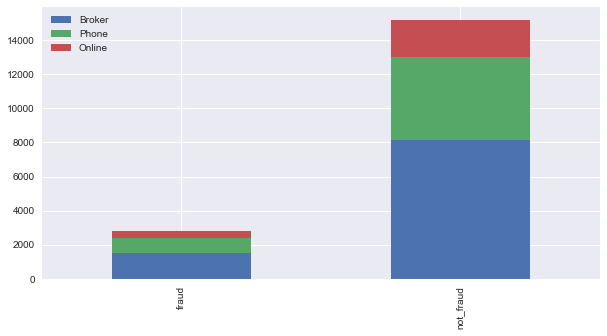

In [74]:
bar_chart('channel')

### policy_report_filed_ind

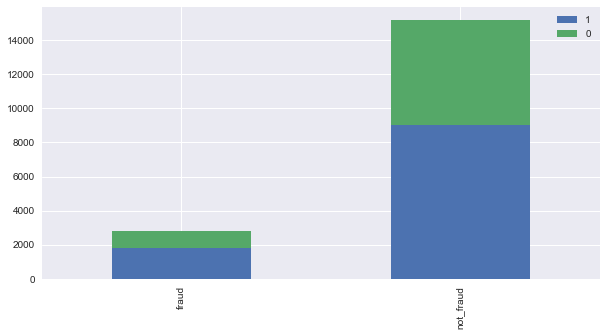

In [75]:
bar_chart('policy_report_filed_ind')

### claim_est_payout

In [76]:
train.claim_est_payout.describe()

count    17981.000000
mean      4975.792083
std       2215.706510
min        282.639432
25%       3337.029436
50%       4668.796318
75%       6255.901066
max      17218.345010
Name: claim_est_payout, dtype: float64

(0, 17500)

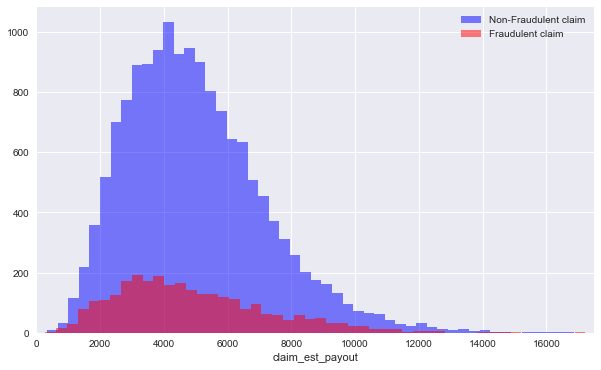

In [77]:
# Distribution of claim_est_payout
plt.figure(figsize=(10,6))
train[train['fraud']==0]['claim_est_payout'].hist(alpha=0.5,color='blue',bins=50,label='Non-Fraudulent claim')
train[train['fraud']==1]['claim_est_payout'].hist(alpha=0.5,color='red',bins=50,label='Fraudulent claim')
plt.legend()
plt.xlabel('claim_est_payout')
plt.xlim([0,17500])

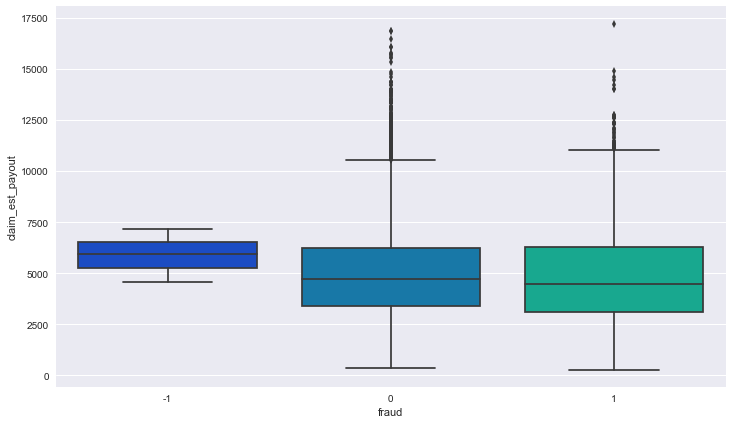

In [78]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='fraud',y='claim_est_payout',data=train,palette='winter')

### age_of_vehicle

In [79]:
train.age_of_vehicle.describe()

count    17990.000000
mean         5.008060
std          2.258391
min          0.000000
25%          3.000000
50%          5.000000
75%          6.000000
max         16.000000
Name: age_of_vehicle, dtype: float64

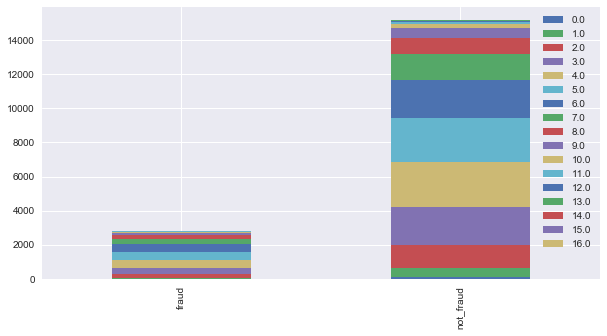

In [80]:
bar_chart('age_of_vehicle')

### vehicle_category

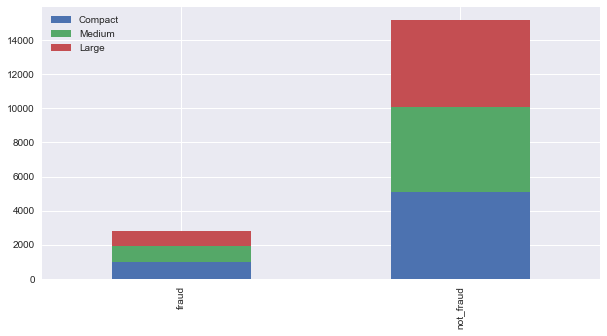

In [81]:
bar_chart('vehicle_category')

### vehicle_price

In [82]:
train.vehicle_price.describe()

count     17998.000000
mean      23089.123114
std       11988.429767
min        2457.329316
25%       14279.574850
50%       20948.879250
75%       29562.232780
max      127063.506000
Name: vehicle_price, dtype: float64

(0, 130000)

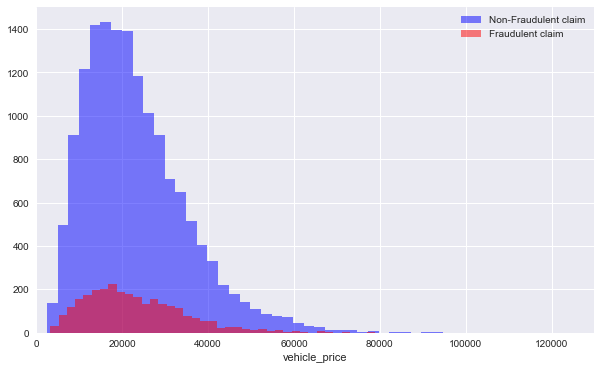

In [83]:
# Distribution of vehicle_price
plt.figure(figsize=(10,6))
train[train['fraud']==0]['vehicle_price'].hist(alpha=0.5,color='blue',bins=50,label='Non-Fraudulent claim')
train[train['fraud']==1]['vehicle_price'].hist(alpha=0.5,color='red',bins=50,label='Fraudulent claim')
plt.legend()
plt.xlabel('vehicle_price')
plt.xlim([0,130000])

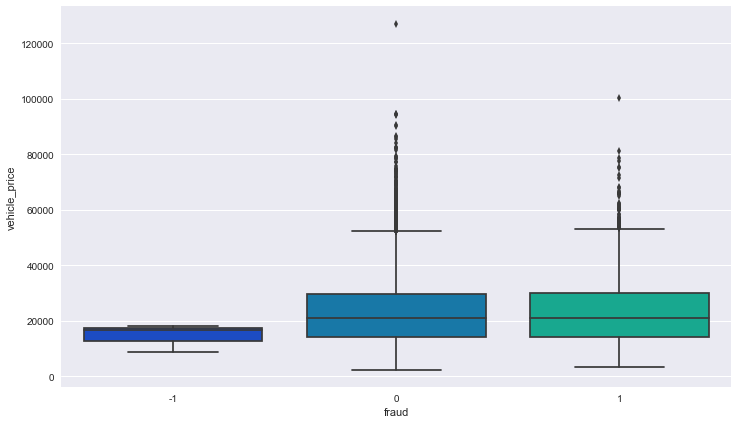

In [84]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='fraud',y='vehicle_price',data=train,palette='winter')

### 4.22 vehicle_color

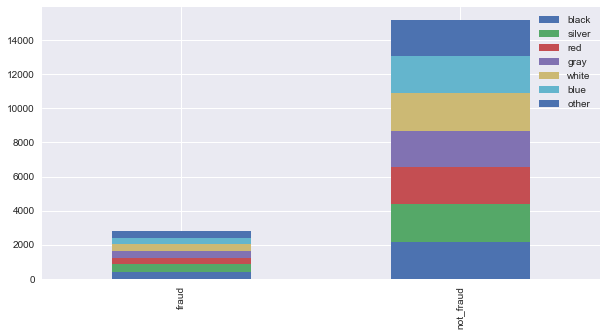

In [85]:
bar_chart('vehicle_color')

### 4.23 vehicle_weight

In [87]:
train.vehicle_weight.describe()

count     17998.000000
mean      23031.322385
std       12052.385584
min        2429.429302
25%       14164.122133
50%       20838.150260
75%       29430.446293
max      123016.650400
Name: vehicle_weight, dtype: float64

(0, 125000)

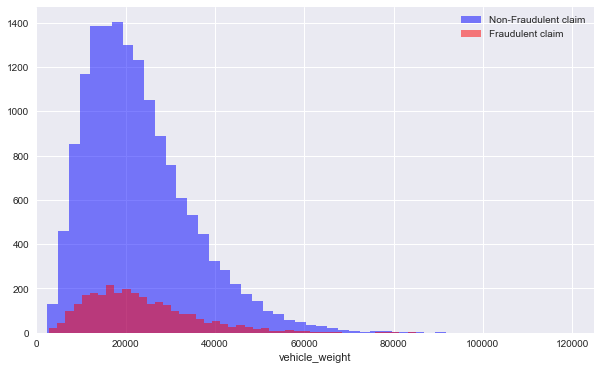

In [88]:
# Distribution of vehicle_weight
plt.figure(figsize=(10,6))
train[train['fraud']==0]['vehicle_weight'].hist(alpha=0.5,color='blue',bins=50,label='Non-Fraudulent claim')
train[train['fraud']==1]['vehicle_weight'].hist(alpha=0.5,color='red',bins=50,label='Fraudulent claim')
plt.legend()
plt.xlabel('vehicle_weight')
plt.xlim([0,125000])

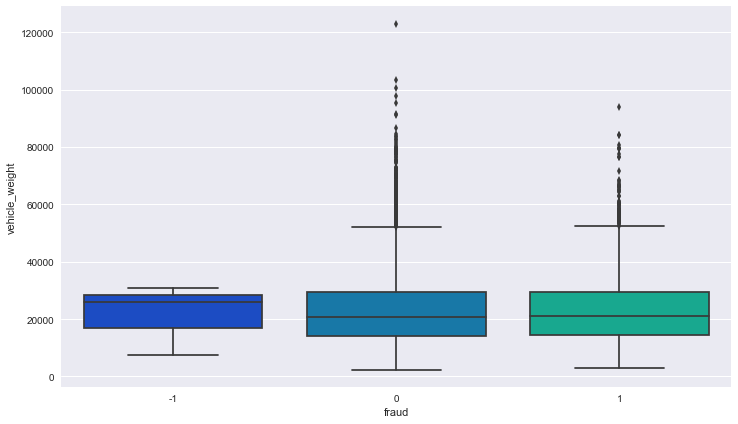

In [89]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='fraud',y='vehicle_weight',data=train,palette='winter')